<a href="https://colab.research.google.com/github/IgorAlexeew/AI/blob/main/ReflectingBear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reflecting Bear
## Предыстория
Медведь Панда в замешательстве. Он пытается придумать, как все должно выглядеть в зеркале, но получает неверные результаты. В его координатах зеркало лежит вдоль первой оси. Но, как и всегда у медведей, его система координат не ортонормирована: поэтому то, что, как он думает, перпендикулярно зеркалу, вообще не то направление, в котором зеркало отражает. Помогите Медведю написать код, который будет правильно выполнять вычисления его матрицы!

## Инструкции
В этом задании вы напишете функцию на Python, которая будет создавать матрицу преобразования для отражения векторов в зеркале под произвольным углом.

Основываясь на последнем задании, где вы написали код для построения ортонормированного базиса по на набору входных векторов, здесь вы возьмете матрицу, которая принимает простую форму в этом базисе, и преобразуете ее в наш исходный базис.
Вспомните из последней лекции:

$ T=E T_{E} E^{-1} $

Вы напишете функцию, которая будет строить эту матрицу.
Это задание несложное концептуально, но поможет вам развить и проверить вашу способность выражать математические идеи в коде. То есть, здесь ваш код будет относительно коротким, но вы получите меньше информации о том, как его писать.

### Матрицы в Python
В этом упражнении мы снова будем использовать оператор @.
Напомним, в предыдущем упражнении мы использовали этот оператор для получения скалярного произведения векторов.
В общем случае оператор будет комбинировать векторы и / или матрицы ожидаемым способом линейной алгебры,
то есть это будет или скалярное произведение вектора, или умножение матриц, или матричная операция над вектором, в зависимости от его операндов.
Например, чтобы вычислить следующие выражения,

\\( a = \mathbf{s}\cdot\mathbf{t} \\)

\\( \mathbf{s} = A\mathbf{t} \\)

\\( M = A B \\),

One would use the code,
```python
a = s @ t
s = A @ t
M = A @ B
```
(В отличие от оператора \\( * \\), который выполняет поэлементное умножение или умножение на скаляр.)


Возможно, вам понадобится использовать какие-нибудь из следующих функций:
```python
inv(A)
transpose(A)
gsBasis(A)
```
которые возвращают, соответственно, инверсию матрицы, транспонирование матрицы и матрицу ортонормированных векторов-столбцов, заданную общей матрицей векторов-столбцов, то есть выполняют процесс Грама-Шмидта.
В этом упражнении вам придется комбинировать некоторые из этих функций.


In [ ]:

# запустите эту ячейку один раз
!wget https://github.com/andrew-veriga/MathForML/raw/master/MathForMLAssignes.zip
!unzip -u MathForMLAssignes.zip
!rm MathForMLAssignes.zip


--2024-01-18 13:04:17--  https://github.com/andrew-veriga/MathForML/raw/master/MathForMLAssignes.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrew-veriga/MathForML/master/MathForMLAssignes.zip [following]
--2024-01-18 13:04:17--  https://raw.githubusercontent.com/andrew-veriga/MathForML/master/MathForMLAssignes.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2369 (2.3K) [application/zip]
Saving to: ‘MathForMLAssignes.zip’

MathForMLAssignes.z 100%[===================>]   2.31K  --.-KB/s    in 0s      

2024-01-18 13:04:17 (38.8 MB/s) - ‘MathForMLAssignes.zip’ saved [2369/2369]

Arch

In [ ]:

import numpy as np
from numpy.linalg import norm, inv
from numpy import transpose
from bearNecessities import *

In [ ]:
# Вы должны отредактировать эту ячейку.

# В этой функции вы вернете матрицу преобразования T,
# построив его из ортонормированного базиса E, который вы создадите из базиса Панды
# и матрицу преобразования в координатах зеркала TE.

def build_reflection_matrix(bearBasis):
    # Используйте функцию gsBasis для bearBasis, чтобы получить ортонормированный базис зеркала.
    E = gsBasis(bearBasis)

    # Создайте матрицу зеркала TE, инвертируя последний компонент вектора.
    TE = np.array([[1, 0],
                   [0, -1]])

    # Combine the matrices E and TE to produce your transformation matrix.
    # Объедините матрицы E и TE, чтобы получить матрицу преобразования T.
    T = np.dot(E, TE)

    # И наконец, возвращаем результат.
    return T


## Проверьте свой код перед отправкой
Чтобы проверить код, который вы написали выше, запустите ячейку (выберите ячейку выше, затем нажмите кнопку воспроизведения [▶ |] или нажмите Shift-Enter).
Затем вы можете использовать приведенный ниже код, чтобы проверить свою функцию.
эту ячейку не нужно отправлять; вы можете редактировать и запускать ее сколько угодно.

В приведенном ниже коде показано изображение медведя Панды.
Если вы правильно реализовали описанную выше функцию, вы также увидите отражение Медведя в его зеркале.
Оранжевые оси - это базис Медведя, а розовые оси - ортонормированный базис зеркала.

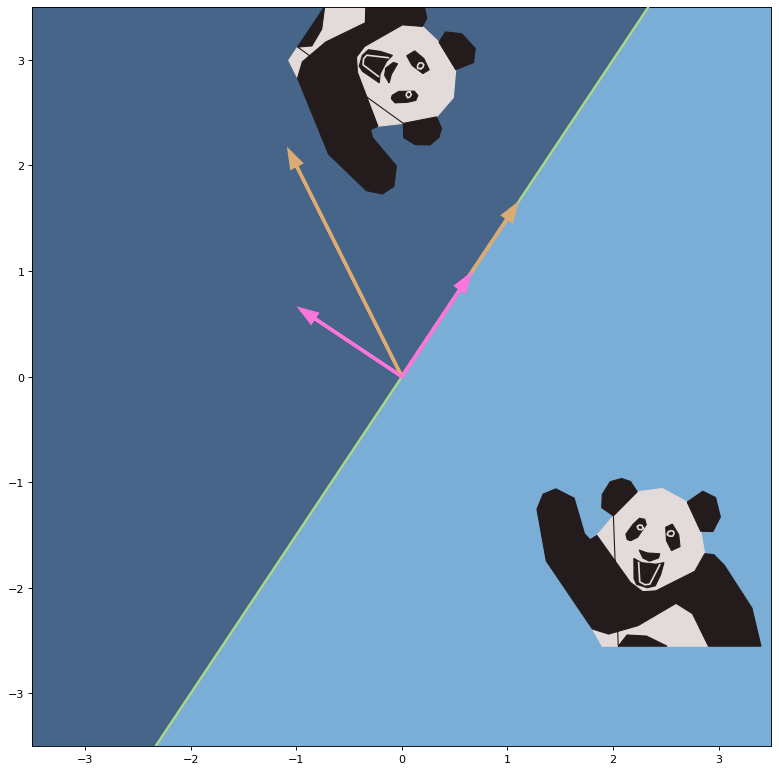

In [ ]:
# Сначала загрузим Pyplot, библиотеку построения графиков.
%matplotlib inline
import matplotlib.pyplot as plt
# Это матрица базисных векторов Медведя.
# (Выполнив упражнение один раз, попробуйте измените базис Медведя и посмотрите что произойдет.)
bearBasis = np.array(
    [[1,   -1],
     [1.5, 2]])
# Эта строка использует ваш код построения матрицы преобразования.
T = build_reflection_matrix(bearBasis)

# Медведь нарисован как набор многоугольников, вершины которых размещены в виде матричного списка векторов-столбцов.
# У нас есть три таких списка неквадратных матриц: bear_white_fur, bear_black_fur и bear_face.
# Мы составим новые списки вершин, применяя вычисленную вами матрицу T.

reflected_bear_white_fur = T @ bear_white_fur
reflected_bear_black_fur = T @ bear_black_fur
reflected_bear_face = T @ bear_face

# В следующей строке выполняется код для настройки графической среды.
ax = draw_mirror(bearBasis)


# Сначала мы начертим Медведя, его белый мех, его черный мех и его морду.

ax.fill(bear_white_fur[0], bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(bear_black_fur[0], bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(bear_face[0], bear_face[1], color=bear_white, zorder=3)

# Далее мы начертим отражение Медведя.
ax.fill(reflected_bear_white_fur[0], reflected_bear_white_fur[1], color=bear_white, zorder=1)
ax.fill(reflected_bear_black_fur[0], reflected_bear_black_fur[1], color=bear_black, zorder=2)
ax.plot(reflected_bear_face[0], reflected_bear_face[1], color=bear_white, zorder=3);
